In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import math
import csv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


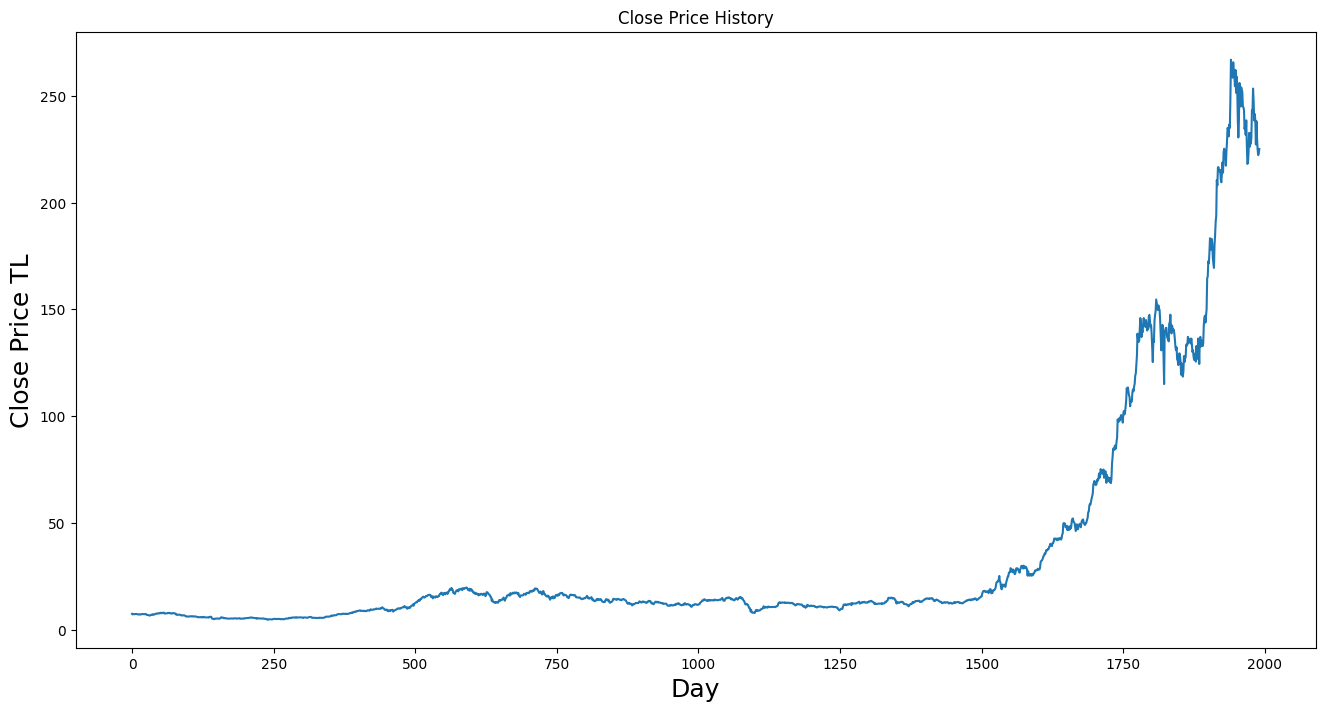

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2016.THYAO.IS.csv')
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Day',fontsize=18)
plt.ylabel('Close Price TL',fontsize=18)
plt.show()

In [ ]:
df = data.filter(['Close'])
dataset = df.values
data_split = math.ceil(len(dataset)*0.8)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:data_split, :]
features = []
label = []

for i in range (5,len(train_data)):
  features.append(train_data[i-5:i, 0])
  label.append(train_data[i,0])

features, label = np.array(features), np.array(label)
features = np.reshape(features, (features.shape[0], features.shape[1],1))


In [ ]:
model = Sequential() #a sequential model is a linear stack of layers, where you can simply add one layer at a time in sequence
model.add(LSTM(200, return_sequences=True, input_shape = (features.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(200,return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(1))

LSTMs are designed to capture long-term dependencies in data sequences, making them particularly effective for tasks involving sequential or time series data. LSTMs are particularly effective for time series prediction tasks where the input data has a temporal order, such as stock prices, weather data, or sensor readings. They can capture complex patterns and dependencies in the data, making them suitable for accurate predictions.
50: This specifies that the LSTM layer will have 50 units or neurons. You can adjust this number based on the complexity of your problem and the amount of data you have.
return_sequences=True: This parameter is set to True because you want the LSTM layer to return the full sequence of outputs for each input sequence. This is typically used when you have a sequence prediction task.
return_sequences=False means that this LSTM layer will only return the output for the last step in the input sequence.
input_shape=(features.shape[1], 1): This parameter defines the shape of the input data that the LSTM layer will receive. features.shape[1] represents the number of time steps in each input sequence, and 1 represents the number of features for each time step. This is a common configuration for univariate time series data.

Dropout is a regularization technique used to prevent overfitting. It randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting.
Dense(1): This is the output layer of the network. For a regression task (predicting a numerical value), a single neuron is used in the output layer without any activation function.

In [ ]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
model.fit(features,label,batch_size=1, epochs=40)

Epoch 1/40
1588/1588 [==============================] - 31s 16ms/step - loss: 4.8743e-05
Epoch 2/40
1588/1588 [==============================] - 27s 17ms/step - loss: 2.8152e-05
Epoch 3/40
1588/1588 [==============================] - 27s 17ms/step - loss: 2.5104e-05
Epoch 4/40
1588/1588 [==============================] - 27s 17ms/step - loss: 2.0318e-05
Epoch 5/40
1588/1588 [==============================] - 27s 17ms/step - loss: 1.8936e-05
Epoch 6/40
1588/1588 [==============================] - 27s 17ms/step - loss: 1.8832e-05
Epoch 7/40
1588/1588 [==============================] - 26s 17ms/step - loss: 1.8053e-05
Epoch 8/40
1588/1588 [==============================] - 26s 17ms/step - loss: 2.0284e-05
Epoch 9/40
1588/1588 [==============================] - 27s 17ms/step - loss: 1.5499e-05
Epoch 10/40
1588/1588 [==============================] - 27s 17ms/step - loss: 1.9441e-05
Epoch 11/40
1588/1588 [==============================] - 27s 17ms/step - loss: 1.5513e-05
Epoch 12/40
1588/15

In [ ]:
test_data = scaled_data[data_split - 5: , :]
test_f = []
test_l = dataset[data_split:, :]
for i in range (5,len(test_data)):
  test_f.append(test_data[i-5:i, 0])
test_f = np.array(test_f)
test_f = np.reshape(test_f, (test_f.shape[0], test_f.shape[1],1))

In [ ]:
predictions = model.predict(test_f)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 11ms/step


In [ ]:
print("RMSE:"+str(np.sqrt(mean_squared_error(test_l, predictions))))

RMSE:14.991355843011169


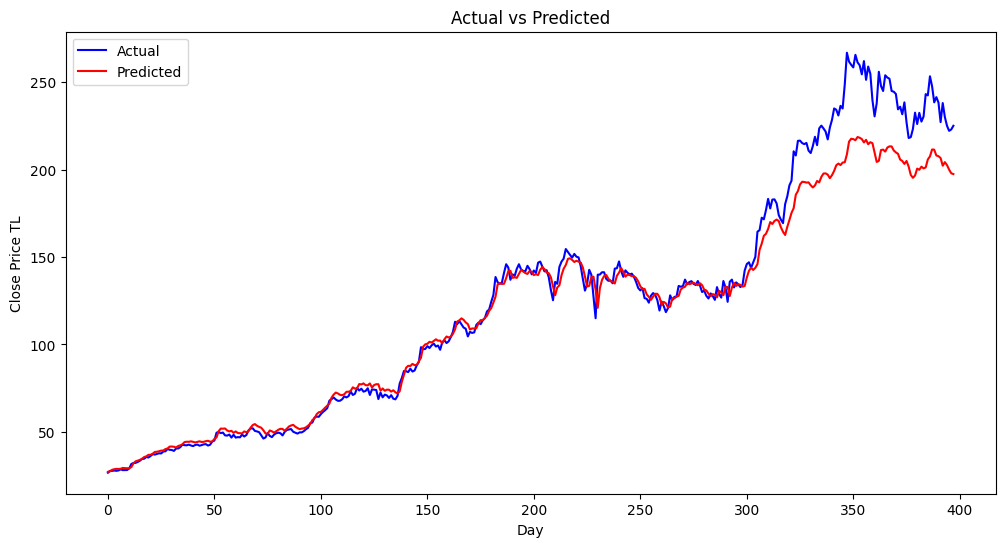

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_l, label='Actual', color='blue')

plt.plot(predictions, label='Predicted', color='red')

plt.title('Actual vs Predicted')
plt.xlabel('Day')
plt.ylabel('Close Price TL')
plt.legend()
plt.show()
